In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import cv2 
import pandas as pd
import sklearn
from sklearn.cluster import KMeans

(533, 800, 3)
(100, 150, 3)


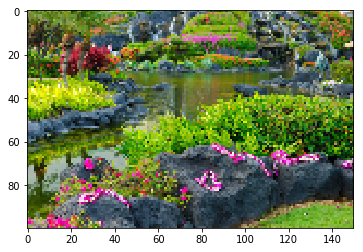

In [39]:
## Data

im = cv2.imread('/home/raghav/Pictures/waterfall.jpg')
print im.shape

r = im.shape[0]
c = im.shape[1]

new_r = 100
new_c = int(new_r*float(c)/r)

im = cv2.resize(im, (new_c ,new_r))  ## format is - (no. of columns, no. of rows)
print im.shape

im = cv2.cvtColor(im, (cv2.COLOR_BGR2RGB))
plt.imshow(im)

plt.show()

In [40]:
## Data Generation - Each pixel is one data point. A data point is defined by 3 attributes(R, G, B)
cols = im.shape[-1]
data = im.reshape((-1,cols))
print data.shape

(15000, 3)


In [41]:
## Clustering
km = KMeans(n_clusters=8)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
center_color = np.array(km.cluster_centers_, dtype='uint8')
print center_color
print center_color.shape

[[ 32  45  32]
 [114 143  34]
 [110 124 120]
 [ 63  77  83]
 [166 191  35]
 [183 180 169]
 [ 64 107  17]
 [210  58 129]]
(8, 3)


In [43]:
freq = np.unique(km.labels_, return_counts=True)[1]
print freq
print freq.sum()
freq = freq/float(data.shape[0])  # To find the percentage of each color
print freq

[2765 2549 1957 2813 1500  914 2068  434]
15000
[ 0.18433333  0.16993333  0.13046667  0.18753333  0.1         0.06093333
  0.13786667  0.02893333]


In [44]:
DOM = [[freq[ix],center_color[ix]] for ix in range(km.n_clusters)]
for ij in DOM:
    print ij
    print '------------'

[0.18433333333333332, array([32, 45, 32], dtype=uint8)]
------------
[0.16993333333333333, array([114, 143,  34], dtype=uint8)]
------------
[0.13046666666666668, array([110, 124, 120], dtype=uint8)]
------------
[0.18753333333333333, array([63, 77, 83], dtype=uint8)]
------------
[0.10000000000000001, array([166, 191,  35], dtype=uint8)]
------------
[0.060933333333333332, array([183, 180, 169], dtype=uint8)]
------------
[0.13786666666666667, array([ 64, 107,  17], dtype=uint8)]
------------
[0.028933333333333332, array([210,  58, 129], dtype=uint8)]
------------


In [45]:
struc = []
for ix in range(km.n_clusters):
    #print ix
    ele = []
    ele.append(freq[ix])
    ele.append(center_color[ix])
    struc.append(ele)

for ij in struc:
    print ij
    print '----------'

[0.18433333333333332, array([32, 45, 32], dtype=uint8)]
----------
[0.16993333333333333, array([114, 143,  34], dtype=uint8)]
----------
[0.13046666666666668, array([110, 124, 120], dtype=uint8)]
----------
[0.18753333333333333, array([63, 77, 83], dtype=uint8)]
----------
[0.10000000000000001, array([166, 191,  35], dtype=uint8)]
----------
[0.060933333333333332, array([183, 180, 169], dtype=uint8)]
----------
[0.13786666666666667, array([ 64, 107,  17], dtype=uint8)]
----------
[0.028933333333333332, array([210,  58, 129], dtype=uint8)]
----------


In [46]:
DOM = sorted(DOM, key=lambda z:z[0], reverse=True)
for im in DOM:
    print im
    print '---------'

[0.18753333333333333, array([63, 77, 83], dtype=uint8)]
---------
[0.18433333333333332, array([32, 45, 32], dtype=uint8)]
---------
[0.16993333333333333, array([114, 143,  34], dtype=uint8)]
---------
[0.13786666666666667, array([ 64, 107,  17], dtype=uint8)]
---------
[0.13046666666666668, array([110, 124, 120], dtype=uint8)]
---------
[0.10000000000000001, array([166, 191,  35], dtype=uint8)]
---------
[0.060933333333333332, array([183, 180, 169], dtype=uint8)]
---------
[0.028933333333333332, array([210,  58, 129], dtype=uint8)]
---------


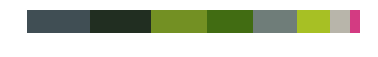

In [49]:
patch = np.ones((40,600,3))
start = 0
for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*patch.shape[1])
    end = start + width
    patch[:, start:end, :] =  255 - DOM[ix][1]
    start = end
    plt.axis("off")
    plt.imshow(patch)
plt.show()